<a href="https://colab.research.google.com/github/FaisalKhan19/AI-Farmer-s-Assistance/blob/main/Minor_Project__Faisal_Ziya_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
tf.__version__

'2.10.1'

## Importing training and test datasets by `ImageDataGenerator` method of Keras

* Images rescaled between (0,1)
* Batch size = 42
* Images sized to (300,300)
* All colour channels included

In [ ]:
# Setting the paths for training and test data
train_dir = "C://Users//Faisal Ali Khan//Downloads//train_data"
test_dir =  "C://Users//Faisal Ali Khan//Downloads//test"

from tensorflow.keras.preprocessing.image import ImageDataGenerator

INPUT_SIZE = (300,300)

train_datagen = ImageDataGenerator(rescale=1/255.0)
test_datagen = ImageDataGenerator(rescale=1/255.0)

train_datagen_augmented = ImageDataGenerator(rescale=1/255.0,
                                             rotation_range=0.2, # how much do you want to rotate an image?
                                             shear_range=0.2, # how much do you want to shear an image?
                                             zoom_range=0.2, # zoom in randomly on an image
                                             width_shift_range=0.2, # move your iamge around on the x-axis
                                             height_shift_range=0.2, # move your image around on the y-axis
                                             horizontal_flip=True) # do you want to flip and image?

train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(300, 300),
                                                                   batch_size=32,
                                                                   class_mode=None,
                                                                   shuffle=True) # for demonstration purposes only

train_data = train_datagen.flow_from_directory(directory=train_dir,
                                              batch_size=32,
                                              target_size=(300,300),
                                              class_mode=None,
                                              seed=42)


test_data = test_datagen.flow_from_directory(directory=test_dir,
                                               batch_size=32,
                                               target_size=(300,300),
                                               class_mode=None,
                                               seed=42)

Found 347 images belonging to 4 classes.
Found 347 images belonging to 4 classes.
Found 158 images belonging to 4 classes.


In [ ]:
cls = train_data.class_indices

cls

{'Alluvial Soil': 0, 'Black Soil': 1, 'Clay Soil': 2, 'Red Soil': 3}

In [ ]:
# Let's visualize our data
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import os

def view_random_image(target_dir, target_class):
  # Setup the target directory (we'll view images form here)
  target_folder = target_dir + target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder),1)
  print(random_image)
  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + '/' + random_image[0])
  plt.imshow(img)
  # plt.title(target_class)

  print(f"Image shape: {img.shape}") # Show the shape of the image

#   return img

['Clay_3.jpg']
Image shape: (192, 263, 3)


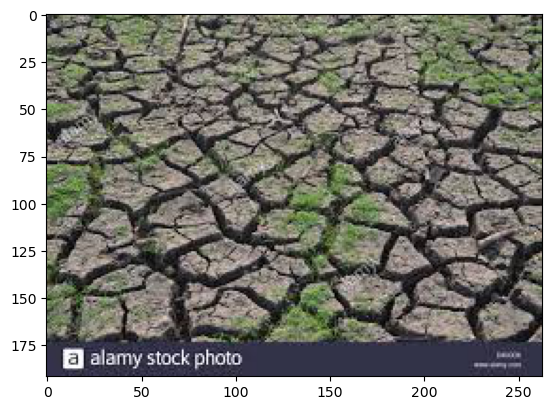

In [ ]:
view_random_image(test_dir,"/Clay soil")

### Training the proposed model on our dataset

#### Model Architecture:
* (32,64,128,64,32)
* Pool size = (2,2)
* Filter Size = (5, 5)
* Activation = 'relu'

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.activations import relu, softmax

#Define the model
model_P1 = Sequential()

# Add the convolutional + pooling layers
model_P1.add(Conv2D(32, (5, 5), activation=relu, input_shape=(300,300,3)))
model_P1.add(MaxPooling2D(pool_size=(2, 2)))
model_P1.add(Conv2D(64, (5, 5), activation=relu))
model_P1.add(MaxPooling2D(pool_size=(2, 2)))
model_P1.add(Conv2D(128, (5, 5), activation=relu))
model_P1.add(MaxPooling2D(pool_size=(2, 2)))
model_P1.add(Conv2D(64, (5, 5), activation=relu))
model_P1.add(MaxPooling2D(pool_size=(2, 2)))
model_P1.add(Conv2D(32, (5, 5), activation=relu))
model_P1.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the output of the last convolutional layer
model_P1.add(Flatten())

# Add the fully connected layers
model_P1.add(Dense(1024, activation=relu))
model_P1.add(Dense(4, activation=softmax))

# Compile the model
model_P1.compile(optimizer=tf.keras.optimizers.Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

model_P1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 296, 296, 32)      2432      
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 148, 148, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 144, 144, 64)      51264     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 72, 72, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_12 (Conv2D)          (None, 68, 68, 128)       204928    
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 34, 34, 128)     

## Using lr_scheduler to find the optimal learning rate

In [ ]:
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

history_P1 = model_P1.fit(train_data,
                       steps_per_epoch=len(train_data),
                       epochs=50,
                       callbacks=[lr_scheduler])

Epoch 1/50
11/11 [==============================] - 8s 302ms/step - loss: 1.3437 - accuracy: 0.4179 - lr: 1.0000e-04
Epoch 2/50
11/11 [==============================] - 2s 205ms/step - loss: 1.2172 - accuracy: 0.5418 - lr: 1.1220e-04
Epoch 3/50
11/11 [==============================] - 2s 201ms/step - loss: 0.9868 - accuracy: 0.6081 - lr: 1.2589e-04
Epoch 4/50
11/11 [==============================] - 2s 197ms/step - loss: 0.8522 - accuracy: 0.6657 - lr: 1.4125e-04
Epoch 5/50
11/11 [==============================] - 2s 220ms/step - loss: 0.7641 - accuracy: 0.7032 - lr: 1.5849e-04
Epoch 6/50
11/11 [==============================] - 3s 219ms/step - loss: 0.6734 - accuracy: 0.7781 - lr: 1.7783e-04
Epoch 7/50
11/11 [==============================] - 2s 201ms/step - loss: 0.6796 - accuracy: 0.7464 - lr: 1.9953e-04
Epoch 8/50
11/11 [==============================] - 2s 187ms/step - loss: 0.6478 - accuracy: 0.7637 - lr: 2.2387e-04
Epoch 9/50
11/11 [==============================] - 2s 219ms/ste

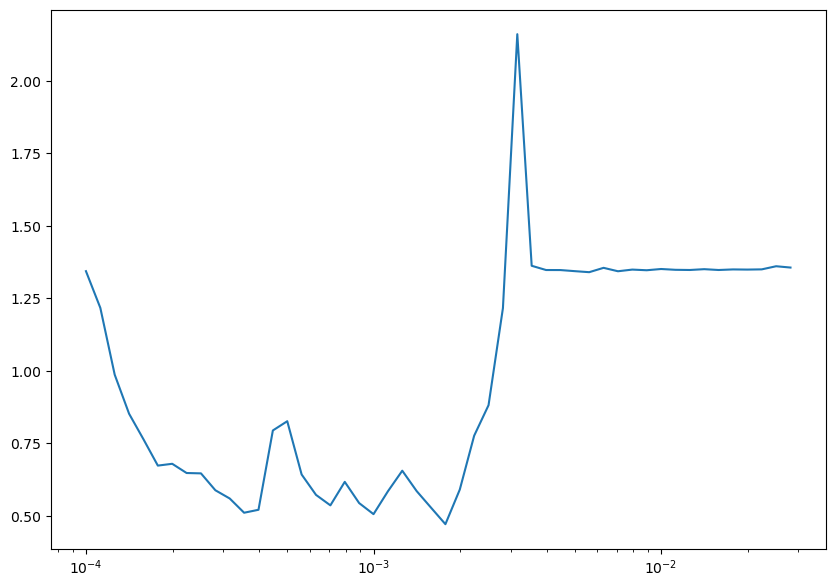

In [ ]:
loss = history_P1.history['loss']
lr = history_P1.history['lr']

plt.figure(figsize=(10,7))
plt.semilogx(lr,loss)
plt.xlabel='Learning Rate'
plt.ylabel='Loss'
plt.title='Learing rate vs Loss'
plt.show()

## Optimal Learning rate found:
> `8e-3`

In [ ]:
# Compile the model
model_P1.compile(optimizer=tf.keras.optimizers.Adam(8e-5), loss='categorical_crossentropy', metrics=['accuracy'])

# Creating an early stopping cacllback
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

#Fitting the model
history_P1 = model_P1.fit(train_data_augmented,
                       steps_per_epoch=len(train_data),
                       epochs=75,
                       callbacks=[early_stop],
                       validation_data=[test_data],
                       validation_steps=len(test_data))

Epoch 1/75
11/11 [==============================] - 10s 807ms/step - loss: 1.3553 - accuracy: 0.3026 - val_loss: 1.4026 - val_accuracy: 0.2149
Epoch 2/75
11/11 [==============================] - 9s 812ms/step - loss: 1.2395 - accuracy: 0.4640 - val_loss: 1.2213 - val_accuracy: 0.4132
Epoch 3/75
11/11 [==============================] - 9s 852ms/step - loss: 0.9965 - accuracy: 0.5994 - val_loss: 1.0137 - val_accuracy: 0.4215
Epoch 4/75
11/11 [==============================] - 9s 827ms/step - loss: 0.8672 - accuracy: 0.6340 - val_loss: 0.8926 - val_accuracy: 0.6942
Epoch 5/75
11/11 [==============================] - 9s 781ms/step - loss: 0.8330 - accuracy: 0.6628 - val_loss: 0.8372 - val_accuracy: 0.6860
Epoch 6/75
11/11 [==============================] - 9s 806ms/step - loss: 0.7769 - accuracy: 0.7089 - val_loss: 0.8386 - val_accuracy: 0.5372
Epoch 7/75
11/11 [==============================] - 9s 800ms/step - loss: 0.7612 - accuracy: 0.6657 - val_loss: 0.8894 - val_accuracy: 0.7025
Epoch

In [ ]:
model_P1.evaluate(test_data)

4/4 [==============================] - 1s 110ms/step - loss: 0.5255 - accuracy: 0.7769


[0.525481104850769, 0.7768595218658447]

In [ ]:
#Lets create a function to plot out the plot curves

def plot_history(history):

  train_loss = history.history['loss']
  val_loss = history.history['val_loss']
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']
  epochs = range(len(history.history['loss']))

  # Plot the loss curves
  plt.figure(figsize=(7,4))
  plt.plot(epochs, train_loss, label='training loss')
  plt.plot(epochs,val_loss, label='Validation loss')
  # plt.title(title='loss')
  plt.legend()

  # Plot the accuracy curves
  plt.figure(figsize=(7,4))
  plt.plot(epochs,acc, label='Training Accuracy')
  plt.plot(epochs,val_acc, label='Validation Accuracy')
  # plt.title("Accuracy")
  plt.legend();

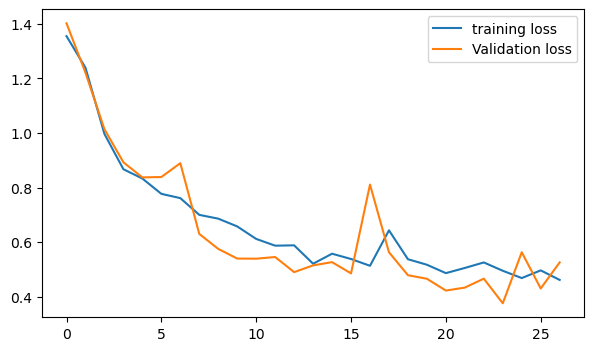

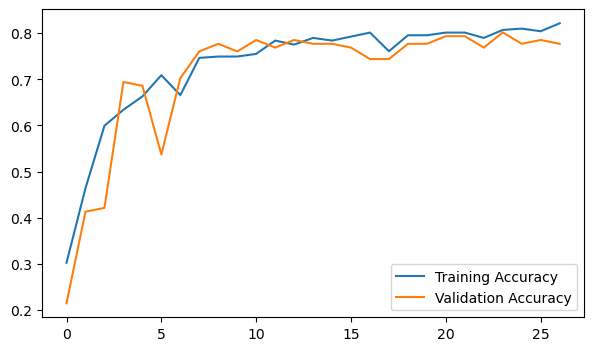

In [ ]:
plot_history(history_P1)

### Training the Proposed Model-2 on the same dataset

#### Model Architecture:
* (64,128,256,128,64)
* Pool size = (2,2)
* Filter Size = (5, 5)
* Activation = 'relu'

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.activations import relu, softmax

# Define the model
model_P2 = Sequential()

# Add the convolutional + pooling layers
model_P2.add(Conv2D(64, (5,5), input_shape=(300,300,3)))
model_P2.add(tf.keras.layers.LeakyReLU())
model_P2.add(MaxPooling2D(pool_size=(2, 2)))
model_P2.add(Conv2D(128, (5, 5), activation=relu))
model_P2.add(MaxPooling2D(pool_size=(2, 2)))
model_P2.add(Conv2D(256, (5, 5), activation=relu))
model_P2.add(MaxPooling2D(pool_size=(2, 2)))
model_P2.add(Conv2D(128, (5, 5), activation=relu))
model_P2.add(MaxPooling2D(pool_size=(2, 2)))
model_P2.add(Conv2D(64, (5, 5), activation=relu))
model_P2.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the output of the last convolutional layer
model_P2.add(Flatten())

# Add the fully connected layers
model_P2.add(Dense(1024, activation=relu))
model_P2.add(Dense(4, activation=softmax))

# Compile the model
model_P2.compile(optimizer=tf.keras.optimizers.Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

model_P2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 296, 296, 64)      4864      
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 296, 296, 64)      0         
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 148, 148, 64)     0         
 g2D)                                                            
                                                                 
 conv2d_16 (Conv2D)          (None, 144, 144, 128)     204928    
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 72, 72, 128)      0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 68, 68, 256)      

In [ ]:
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

history_P2 = model_P2.fit(train_data_augmented,
                       steps_per_epoch=len(train_data),
                       epochs=20,
                       callbacks=[lr_scheduler])

Epoch 1/20
11/11 [==============================] - 169s 13s/step - loss: 1.3420 - accuracy: 0.3148 - lr: 1.0000e-04
Epoch 2/20
11/11 [==============================] - 9s 849ms/step - loss: 1.0477 - accuracy: 0.5802 - lr: 1.1220e-04
Epoch 3/20
11/11 [==============================] - 9s 817ms/step - loss: 0.9051 - accuracy: 0.5895 - lr: 1.2589e-04
Epoch 4/20
11/11 [==============================] - 8s 743ms/step - loss: 0.7481 - accuracy: 0.6914 - lr: 1.4125e-04
Epoch 5/20
11/11 [==============================] - 9s 768ms/step - loss: 0.6178 - accuracy: 0.7685 - lr: 1.5849e-04
Epoch 6/20
11/11 [==============================] - 9s 846ms/step - loss: 0.7615 - accuracy: 0.7160 - lr: 1.7783e-04
Epoch 7/20
11/11 [==============================] - 10s 860ms/step - loss: 0.7039 - accuracy: 0.7531 - lr: 1.9953e-04
Epoch 8/20
11/11 [==============================] - 8s 742ms/step - loss: 0.5732 - accuracy: 0.7840 - lr: 2.2387e-04
Epoch 9/20
11/11 [==============================] - 9s 775ms/st

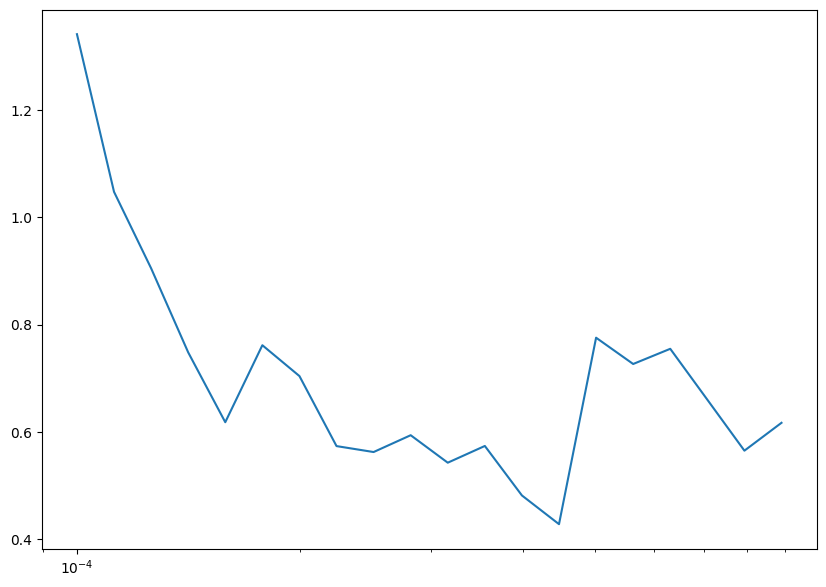

In [ ]:
loss = history_P2.history['loss']
lr = history.history['lr']

plt.figure(figsize=(10,7))
plt.semilogx(lr,loss)
plt.xlabel='Learning Rate'
plt.ylabel='Loss'
plt.title='Learing rate vs Loss'
plt.show()

In [ ]:
# Compile the model
model_P2.compile(optimizer=tf.keras.optimizers.Adam(5e-4), loss='categorical_crossentropy', metrics=['accuracy'])

# Creating an early stopping cacllback
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

#Fitting the model
history_P2 = model_P2.fit(train_data_augmented,
                       steps_per_epoch=len(train_data),callbacks=[early_stop],
                       epochs=75,validation_data=[test_data])

Epoch 1/75
11/11 [==============================] - 18s 1s/step - loss: 1.1991 - accuracy: 0.3919 - val_loss: 1.7769 - val_accuracy: 0.4298
Epoch 2/75
11/11 [==============================] - 9s 782ms/step - loss: 1.0836 - accuracy: 0.5043 - val_loss: 1.0481 - val_accuracy: 0.4298
Epoch 3/75
11/11 [==============================] - 9s 816ms/step - loss: 0.9211 - accuracy: 0.6167 - val_loss: 0.9306 - val_accuracy: 0.5950
Epoch 4/75
11/11 [==============================] - 9s 809ms/step - loss: 0.8474 - accuracy: 0.6340 - val_loss: 0.8443 - val_accuracy: 0.6777
Epoch 5/75
11/11 [==============================] - 9s 779ms/step - loss: 0.7998 - accuracy: 0.6772 - val_loss: 0.6601 - val_accuracy: 0.7603
Epoch 6/75
11/11 [==============================] - 9s 793ms/step - loss: 0.6557 - accuracy: 0.7695 - val_loss: 0.5200 - val_accuracy: 0.7851
Epoch 7/75
11/11 [==============================] - 9s 823ms/step - loss: 0.5811 - accuracy: 0.7839 - val_loss: 0.6569 - val_accuracy: 0.6942
Epoch 8/

In [ ]:
model_P2.evaluate(test_data)

4/4 [==============================] - 1s 150ms/step - loss: 0.6056 - accuracy: 0.7025


[0.6055528521537781, 0.702479362487793]

### Training our Model on the same dataset

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model_N1 = Sequential()

# Convolutional Layers
model_N1.add(Conv2D(32, (1, 1), activation='relu', input_shape=(300, 300, 3)))
model_N1.add(MaxPooling2D((2, 2)))

model_N1.add(Conv2D(64, (2, 2), activation='relu'))
model_N1.add(MaxPooling2D((2, 2)))

model_N1.add(Conv2D(128, (2, 2), activation='relu'))
model_N1.add(MaxPooling2D((2, 2)))

model_N1.add(Conv2D(256, (2, 2), activation='relu'))
model_N1.add(MaxPooling2D((2, 2)))

model_N1.add(Conv2D(512, (2, 2), activation='relu'))
model_N1.add(MaxPooling2D((2, 2)))

# Flatten the output of the last convolutional layer
model_N1.add(Flatten())

# Fully Connected Layers
model_N1.add(Dense(1024, activation='relu'))
model_N1.add(Dropout(0.5))
model_N1.add(Dense(512, activation='relu'))
model_N1.add(Dropout(0.5))
model_N1.add(Dense(4, activation='softmax'))

# Compile the model
model_N1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model_N1.summary()


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 300, 300, 32)      128       
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 150, 150, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_21 (Conv2D)          (None, 149, 149, 64)      8256      
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 74, 74, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_22 (Conv2D)          (None, 73, 73, 128)       32896     
                                                                 
 max_pooling2d_22 (MaxPoolin  (None, 36, 36, 128)     

In [ ]:
# Compile the model
model_N1.compile(optimizer=tf.keras.optimizers.Adam(5e-5), loss='categorical_crossentropy', metrics=['accuracy'])

# Creating an early stopping cacllback
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=4)

history_N1 = model_N1.fit(train_data_augmented,steps_per_epoch=len(train_data),
          epochs=50, validation_data=[test_data], callbacks=[early_stop])

Epoch 1/50
11/11 [==============================] - 12s 943ms/step - loss: 1.3594 - accuracy: 0.3228 - val_loss: 1.4235 - val_accuracy: 0.2314
Epoch 2/50
11/11 [==============================] - 9s 818ms/step - loss: 1.3253 - accuracy: 0.3516 - val_loss: 1.3671 - val_accuracy: 0.4215
Epoch 3/50
11/11 [==============================] - 9s 844ms/step - loss: 1.2992 - accuracy: 0.4035 - val_loss: 1.2891 - val_accuracy: 0.3802
Epoch 4/50
11/11 [==============================] - 9s 781ms/step - loss: 1.2064 - accuracy: 0.5331 - val_loss: 1.1785 - val_accuracy: 0.4132
Epoch 5/50
11/11 [==============================] - 8s 770ms/step - loss: 1.1000 - accuracy: 0.5447 - val_loss: 1.0388 - val_accuracy: 0.5455
Epoch 6/50
11/11 [==============================] - 9s 776ms/step - loss: 0.9899 - accuracy: 0.6542 - val_loss: 0.9367 - val_accuracy: 0.7355
Epoch 7/50
11/11 [==============================] - 9s 794ms/step - loss: 0.9128 - accuracy: 0.6628 - val_loss: 0.8710 - val_accuracy: 0.7107
Epoch

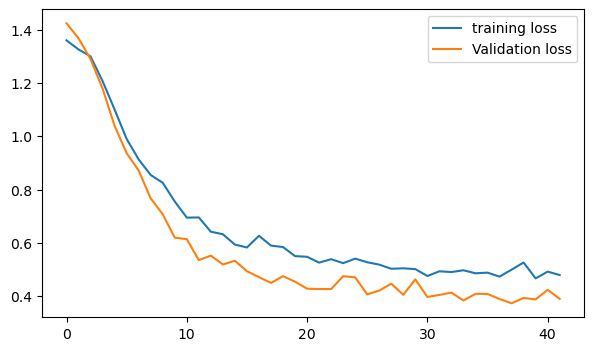

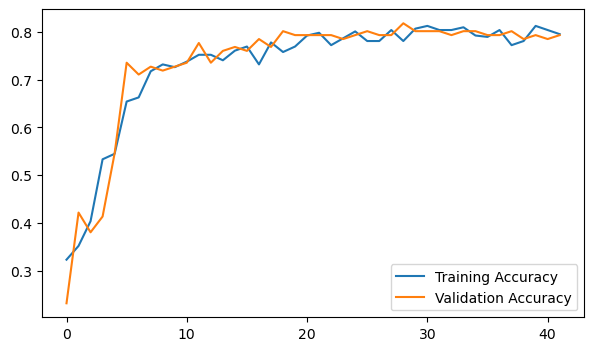

In [ ]:
plot_history(history_N1)

In [ ]:
model_N1.evaluate(test_data)

4/4 [==============================] - 1s 132ms/step - loss: 0.3902 - accuracy: 0.7934


[0.3901762068271637, 0.7933884263038635]

In [ ]:
tf.keras.models.save_model(model_N1, 'Model_N1')
tf.keras.models.save_model(model_N2, 'Model_N2')
tf.keras.models.save_model(model_P1, 'Model_P1')
tf.keras.models.save_model(model_P2, 'Model_P2')
tf.keras.models.save_model(model_P3, 'Model_P3')

INFO:tensorflow:Assets written to: Model_N1\assets


INFO:tensorflow:Assets written to: Model_N1\assets


INFO:tensorflow:Assets written to: Model_N2\assets


INFO:tensorflow:Assets written to: Model_N2\assets


INFO:tensorflow:Assets written to: Model_P1\assets


INFO:tensorflow:Assets written to: Model_P1\assets


INFO:tensorflow:Assets written to: Model_P2\assets


INFO:tensorflow:Assets written to: Model_P2\assets


INFO:tensorflow:Assets written to: Model_P3\assets


INFO:tensorflow:Assets written to: Model_P3\assets


### Training the Third proposed model on our dataset

#### Model Architecture:
* (64,128,32,64,32,128,64)
* Pool size = (2,2)
* Filter Size = (5, 5)
* Activation = 'relu'

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.activations import relu, softmax

# Define the model
model_P3 = Sequential()

# Add the convolutional + pooling layers
model_P3.add(Conv2D(64, (5, 5), padding='same', input_shape=(300,300,3), activation='relu'))
model_P3.add(MaxPooling2D(pool_size=(2, 2)))
model_P3.add(Conv2D(128, (5, 5), padding='same', activation='relu'))
model_P3.add(MaxPooling2D(pool_size=(2, 2)))
model_P3.add(Conv2D(32, (5, 5), padding='same', activation='relu'))
model_P3.add(MaxPooling2D(pool_size=(2, 2)))
model_P3.add(Conv2D(64, (5, 5), padding='same', activation='relu'))
model_P3.add(MaxPooling2D(pool_size=(2, 2)))
model_P3.add(Conv2D(32, (5, 5), padding='same', activation='relu'))
model_P3.add(MaxPooling2D(pool_size=(2, 2)))
model_P3.add(Conv2D(128, (5, 5), padding='same', activation='relu'))
model_P3.add(MaxPooling2D(pool_size=(2, 2)))
model_P3.add(Conv2D(64, (5, 5), padding='same', activation='relu'))
model_P3.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the output of the last convolutional layer
model_P3.add(Flatten())

# Add the fully connected layers
model_P3.add(Dense(1024, activation='relu'))
model_P3.add(Dense(4, activation='softmax'))

# Compile the model
model_P3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model_P3.summary()


Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_46 (Conv2D)          (None, 300, 300, 64)      4864      
                                                                 
 max_pooling2d_46 (MaxPoolin  (None, 150, 150, 64)     0         
 g2D)                                                            
                                                                 
 conv2d_47 (Conv2D)          (None, 150, 150, 128)     204928    
                                                                 
 max_pooling2d_47 (MaxPoolin  (None, 75, 75, 128)      0         
 g2D)                                                            
                                                                 
 conv2d_48 (Conv2D)          (None, 75, 75, 32)        102432    
                                                                 
 max_pooling2d_48 (MaxPoolin  (None, 37, 37, 32)     

In [ ]:
# Compile the model
model_P3.compile(optimizer=tf.keras.optimizers.Adam(5e-5), loss='categorical_crossentropy', metrics=['accuracy'])

# Creating an early stopping cacllback
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

hsitory_P3 = model_P3.fit(train_data_augmented,steps_per_epoch=len(train_data),
          epochs=50, validation_data=[test_data], callbacks=[early_stop])

Epoch 1/50
11/11 [==============================] - 10s 798ms/step - loss: 1.3631 - accuracy: 0.4784 - val_loss: 1.3662 - val_accuracy: 0.4132
Epoch 2/50
11/11 [==============================] - 9s 758ms/step - loss: 1.2898 - accuracy: 0.5101 - val_loss: 1.3225 - val_accuracy: 0.4380
Epoch 3/50
11/11 [==============================] - 8s 742ms/step - loss: 1.1469 - accuracy: 0.5533 - val_loss: 1.1371 - val_accuracy: 0.4380
Epoch 4/50
11/11 [==============================] - 8s 764ms/step - loss: 0.9778 - accuracy: 0.5677 - val_loss: 1.0061 - val_accuracy: 0.4463
Epoch 5/50
11/11 [==============================] - 8s 748ms/step - loss: 0.9148 - accuracy: 0.5850 - val_loss: 0.9519 - val_accuracy: 0.4545
Epoch 6/50
11/11 [==============================] - 8s 751ms/step - loss: 0.8948 - accuracy: 0.6196 - val_loss: 0.9672 - val_accuracy: 0.4545
Epoch 7/50
11/11 [==============================] - 8s 746ms/step - loss: 0.8589 - accuracy: 0.6167 - val_loss: 0.9600 - val_accuracy: 0.4711
Epoch

In [ ]:
model_P3.evaluate(test_data)

4/4 [==============================] - 1s 107ms/step - loss: 0.6785 - accuracy: 0.7521


[0.6784569621086121, 0.7520661354064941]

### Testing our second model

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model_N2 = Sequential()

# Convolutional Layers
model_N2.add(Conv2D(256, (3, 3), activation='relu', input_shape=(300, 300, 3)))
model_N2.add(MaxPooling2D((2, 2)))

model_N2.add(Conv2D(256, (3, 3), activation='relu'))
model_N2.add(MaxPooling2D((2, 2)))

model_N2.add(Conv2D(128, (3, 3), activation='relu'))
model_N2.add(MaxPooling2D((2, 2)))

model_N2.add(Conv2D(256, (3, 3), activation='relu'))
model_N2.add(MaxPooling2D((4, 4)))

model_N2.add(Conv2D(128, (1, 1), activation='relu'))
model_N2.add(MaxPooling2D((4, 4)))

# Flatten the output of the last convolutional layer
model_N2.add(Flatten())

# Fully Connected Layers
model_N2.add(Dense(1024, activation='relu'))
model_N2.add(Dropout(0.5))
model_N2.add(Dense(512, activation='relu'))
model_N2.add(Dropout(0.5))
model_N2.add(Dense(4, activation='softmax'))

# Compile the model
model_N2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model_N2.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 298, 298, 256)     7168      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 149, 149, 256)    0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 147, 147, 256)     590080    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 73, 73, 256)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 71, 71, 128)       295040    
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 35, 35, 128)      0

In [ ]:
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/5))

history_N2 = model_N2.fit(train_data_augmented,
                       steps_per_epoch=len(train_data),
                       epochs=20,
                       callbacks=[lr_scheduler])

Epoch 1/20
11/11 [==============================] - 16s 1s/step - loss: 1.3753 - accuracy: 0.2795 - lr: 1.0000e-04
Epoch 2/20
11/11 [==============================] - 10s 900ms/step - loss: 1.3143 - accuracy: 0.3804 - lr: 1.5849e-04
Epoch 3/20
11/11 [==============================] - 9s 784ms/step - loss: 1.1242 - accuracy: 0.5043 - lr: 2.5119e-04
Epoch 4/20
11/11 [==============================] - 8s 736ms/step - loss: 0.9810 - accuracy: 0.5562 - lr: 3.9811e-04
Epoch 5/20
11/11 [==============================] - 8s 738ms/step - loss: 0.9150 - accuracy: 0.5908 - lr: 6.3096e-04
Epoch 6/20
11/11 [==============================] - 8s 712ms/step - loss: 1.0084 - accuracy: 0.5476 - lr: 0.0010
Epoch 7/20
11/11 [==============================] - 9s 749ms/step - loss: 0.8514 - accuracy: 0.6830 - lr: 0.0016
Epoch 8/20
11/11 [==============================] - 8s 667ms/step - loss: 0.8601 - accuracy: 0.6801 - lr: 0.0025
Epoch 9/20
11/11 [==============================] - 8s 689ms/step - loss: 1.2

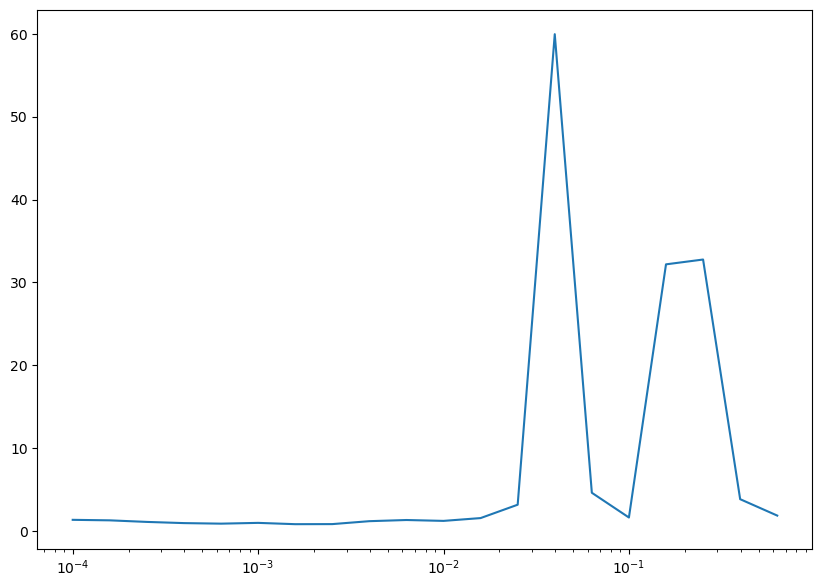

In [ ]:
loss = history_N2.history['loss']
lr = history_N2.history['lr']

plt.figure(figsize=(10,7))
plt.semilogx(lr,loss)
plt.xlabel='Learning Rate'
plt.ylabel='Loss'
plt.title='Learing rate vs Loss'
plt.show()

In [ ]:
# Compile the model
model_N2.compile(optimizer=tf.keras.optimizers.Adam(5e-4), loss='categorical_crossentropy', metrics=['accuracy'])

# Creating an early stopping cacllback
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=4)

history_N2 = model_N2.fit(train_data_augmented,
                    steps_per_epoch=len(train_data),
                    epochs=50,
                    validation_data=[test_data],
                    callbacks=[early_stop])

Epoch 1/50
11/11 [==============================] - 11s 920ms/step - loss: 1.3605 - accuracy: 0.2824 - val_loss: 1.3359 - val_accuracy: 0.4132
Epoch 2/50
11/11 [==============================] - 10s 864ms/step - loss: 1.1187 - accuracy: 0.5043 - val_loss: 0.9680 - val_accuracy: 0.4628
Epoch 3/50
11/11 [==============================] - 9s 843ms/step - loss: 0.8924 - accuracy: 0.6081 - val_loss: 0.9710 - val_accuracy: 0.4628
Epoch 4/50
11/11 [==============================] - 8s 748ms/step - loss: 1.0149 - accuracy: 0.6052 - val_loss: 0.9527 - val_accuracy: 0.5455
Epoch 5/50
11/11 [==============================] - 9s 773ms/step - loss: 0.9117 - accuracy: 0.6427 - val_loss: 0.8779 - val_accuracy: 0.7025
Epoch 6/50
11/11 [==============================] - 9s 764ms/step - loss: 0.7513 - accuracy: 0.7522 - val_loss: 0.5594 - val_accuracy: 0.7686
Epoch 7/50
11/11 [==============================] - 9s 756ms/step - loss: 0.7067 - accuracy: 0.7378 - val_loss: 0.6288 - val_accuracy: 0.7190
Epoc

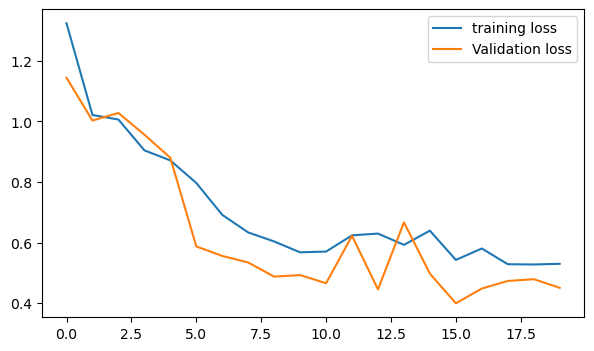

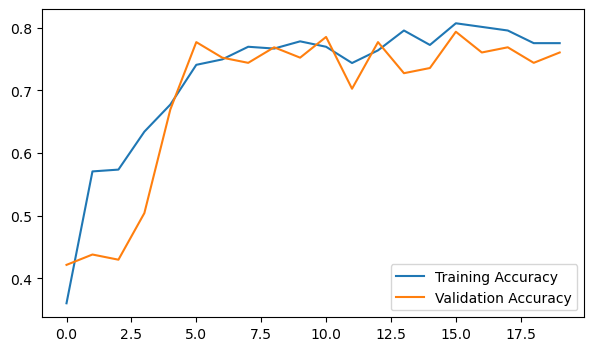

In [ ]:
plot_history(history_N2)

In [ ]:
model_N2.evaluate(test_data)

4/4 [==============================] - 1s 118ms/step - loss: 0.4511 - accuracy: 0.7603


[0.4510689079761505, 0.7603305578231812]

In [ ]:
import pickle

In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
import visualkeras as vk
tf.__version__

'2.10.1'

In [ ]:
model_n1 = tf.keras.models.load_model("C://Users//Faisal Ali Khan//Desktop//Crop-Yield-Prediction-in-India-using-ML-main//Model_N1")

In [ ]:
model_n1.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 300, 300, 32)      128       
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 150, 150, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_21 (Conv2D)          (None, 149, 149, 64)      8256      
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 74, 74, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_22 (Conv2D)          (None, 73, 73, 128)       32896     
                                                                 
 max_pooling2d_22 (MaxPoolin  (None, 36, 36, 128)     

In [ ]:
from tqdm import tqdm
import cv2
import os
os.chdir("C://Users//Faisal Ali Khan//Downloads//train_data")
X = []
Y = []
i=1
for dirc in tqdm(os.listdir(), desc="Loading..."):
    path = "C://Users//Faisal Ali Khan//Downloads//train_data\\{}".format(dirc)
    for f in os.listdir(path):
        path = "C://Users//Faisal Ali Khan//Downloads//train_data\\{}\\{}".format(dirc,f)
        img = cv2.resize(cv2.imread(path),(300,300))
        X.append(img)
        Y.append(i)
    i+=1

Loading...: 100%|████████████████████████████████████████████████████████████████████████| 4/4 [00:03<00:00,  1.19it/s]


In [ ]:
from tqdm import tqdm
import cv2
import os
os.chdir("C://Users//Faisal Ali Khan//Downloads//test")
X_test = []
Y_test = []
i=1
for dirc in tqdm(os.listdir(), desc="Loading..."):
    path = "C://Users//Faisal Ali Khan//Downloads//test\\{}".format(dirc)
    for f in os.listdir(path):
        path = "C://Users//Faisal Ali Khan//Downloads//test\\{}\\{}".format(dirc,f)
        img = cv2.resize(cv2.imread(path),(300,300))
        X_test.append(img)
        Y_test.append(i)
    i+=1

Loading...: 100%|████████████████████████████████████████████████████████████████████████| 4/4 [00:01<00:00,  2.15it/s]


In [ ]:
X = np.array(X)
Y = np.array(Y)
X_test = np.array(X_test)
Y_test = np.array(Y_test)

In [ ]:
model_layer = model_n1.layers[10].output
model_input = model_n1.inputs
model_FE = tf.keras.models.Model(inputs=model_input, outputs=model_layer)

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin

class FeatureExtractorTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, feature_extractor_model):
        self.feature_extractor_model = feature_extractor_model

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        # Reshape the input from (num_samples, height, width, channels) to (num_samples, height, width, channels)
        X = X.reshape(X.shape[0], X.shape[1], X.shape[2], -1)

        # Use the feature_extractor_model to obtain the feature vectors for each input image
        return self.feature_extractor_model.predict(X)

In [ ]:
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [ ]:
svm_clf = SVC()
cnn_svm_model = pipeline = Pipeline([
    ('feature_extractor', FeatureExtractorTransformer(model_FE)),
    ('scaler', StandardScaler()),
    ('svm', svm_clf)
])

In [ ]:
cnn_svm_model.fit(X,Y)

12/12 [==============================] - 7s 384ms/step


Pipeline(steps=[('feature_extractor',
                 FeatureExtractorTransformer(feature_extractor_model=<keras.engine.functional.Functional object at 0x000002C6458DFFA0>)),
                ('scaler', StandardScaler()), ('svm', SVC())])

In [ ]:
cnn_svm_model.score(X,Y)

12/12 [==============================] - 5s 371ms/step


0.9093333333333333

In [ ]:
cnn_svm_model.score(X_test,Y_test)

5/5 [==============================] - 2s 383ms/step


0.8037974683544303

In [ ]:
from joblib import dump

dump(svm_clf, 'C:\\Users\\Faisal Ali Khan\\Desktop\\Flask 2\\venv\\Models\\svm_clf.joblib')

['C:\\Users\\Faisal Ali Khan\\Desktop\\Flask 2\\venv\\Models\\svm_clf.joblib']

In [ ]:
from joblib import load

model = load("C://Users//Faisal Ali Khan//Desktop//Crop-Yield-Prediction-in-India-using-ML-main//Models//cnn_svm_model")

FileNotFoundError: [Errno 2] No such file or directory: 'C://Users//Faisal Ali Khan//Desktop//Crop-Yield-Prediction-in-India-using-ML-main//Models//cnn_svm_model'

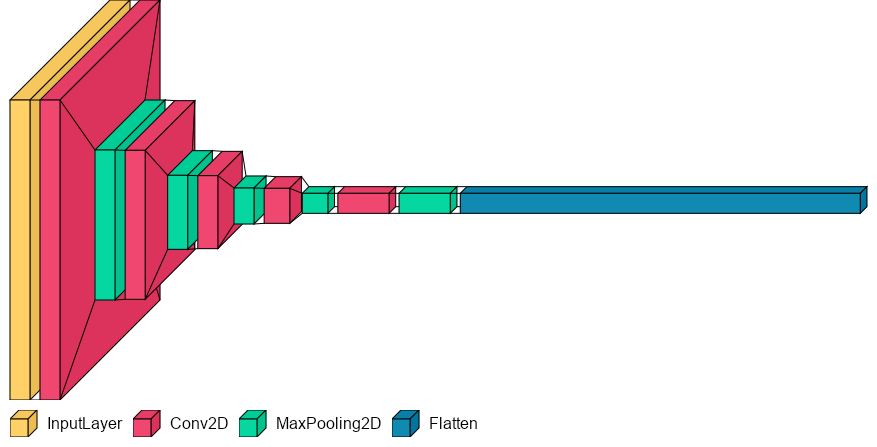

In [ ]:
import  PIL.ImageFont
font = PIL.ImageFont.truetype("arial.ttf",16)
vk.layered_view(model_FE,spacing = 10,scale_xy=1,font = font,legend = True)

In [ ]:
model_FE.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20_input (InputLayer  [(None, 300, 300, 3)]    0         
 )                                                               
                                                                 
 conv2d_20 (Conv2D)          (None, 300, 300, 32)      128       
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 150, 150, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_21 (Conv2D)          (None, 149, 149, 64)      8256      
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 74, 74, 64)       0         
 g2D)                                                            
                                                             